In [1]:
from transformers import AutoTokenizer, AutoModelForQuestionAnswering
from datasets import load_dataset

model_checkpoint = "TusharGoel/LiLT-Document-QA"
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, add_prefix_space=True)
model_predict = AutoModelForQuestionAnswering.from_pretrained(model_checkpoint)

model_predict.eval()
dataset = load_dataset("nielsr/funsd", split="train")
example = dataset[0]
print(example)

question = "What is the Licensee Number?"
print(question)

words = example["words"]
boxes = example["bboxes"]

encoding = tokenizer(question, words, boxes = boxes, return_token_type_ids=True, return_tensors="pt")

word_ids = encoding.word_ids(0)
outputs = model_predict(**encoding)

loss = outputs.loss
start_scores = outputs.start_logits
end_scores = outputs.end_logits

start, end = word_ids[start_scores.argmax(-1).item()], word_ids[end_scores.argmax(-1).item()]
# print(start, end)
print(" ".join(words[start : end + 1]))


c:\Users\DKusuma\AppData\Local\miniconda3\envs\docsblip\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\DKusuma\AppData\Local\miniconda3\envs\docsblip\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\DKusuma\.cache\huggingface\hub\models--TusharGoel--LiLT-Document-QA. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Pytho

{'id': '0', 'words': ['R&D', ':', 'Suggestion:', 'Date:', 'Licensee', 'Yes', 'No', '597005708', 'R&D', 'QUALITY', 'IMPROVEMENT', 'SUGGESTION/', 'SOLUTION', 'FORM', 'Name', '/', 'Phone', 'Ext.', ':', 'M.', 'Hamann', 'P.', 'Harper,', 'P.', 'Martinez', '9/', '3/', '92', 'R&D', 'Group:', 'J.', 'S.', 'Wigand', 'Supervisor', '/', 'Manager', 'Discontinue', 'coal', 'retention', 'analyses', 'on', 'licensee', 'submitted', 'product', 'samples', '(Note', ':', 'Coal', 'Retention', 'testing', 'is', 'not', 'performed', 'by', 'most', 'licensees.', 'Other', 'B&W', 'physical', 'measurements', 'as', 'ends', 'stability', 'and', 'inspection', 'for', 'soft', 'spots', 'in', 'ciparettes', 'are', 'thought', 'to', 'be', 'sufficient', 'measures', 'to', 'assure', 'cigarette', 'physical', 'integrity.', 'The', 'proposed', 'action', 'will', 'increase', 'laboratory', 'productivity', '.', ')', 'Suggested', 'Solutions', '(s)', ':', 'Delete', 'coal', 'retention', 'from', 'the', 'list', 'of', 'standard', 'analyses', 'per

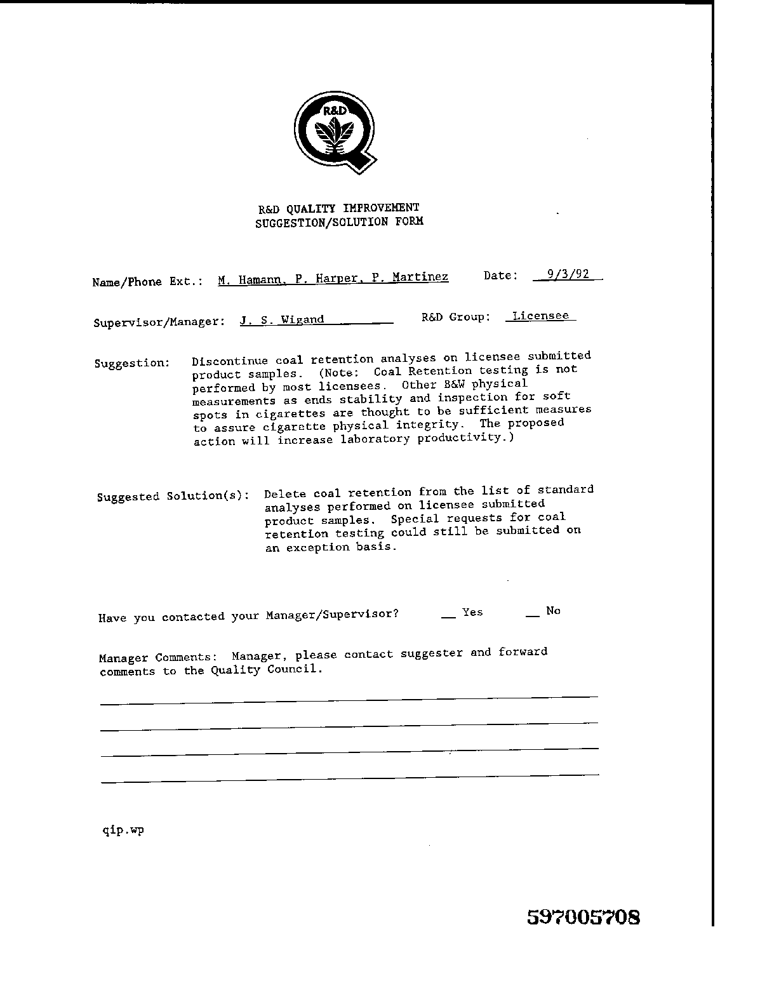

In [7]:
example['image']

In [12]:
# question = "What is it about?"
question = "What is the Licensee Number?"
print(question)

words = example["words"]
boxes = example["bboxes"]

encoding = tokenizer(question, words, boxes = boxes, return_token_type_ids=True, return_tensors="pt")

word_ids = encoding.word_ids(0)
outputs = model_predict(**encoding)

loss = outputs.loss
start_scores = outputs.start_logits
end_scores = outputs.end_logits

start, end = word_ids[start_scores.argmax(-1).item()], word_ids[end_scores.argmax(-1).item()]
# print(start, end)
print(" ".join(words[start : end + 1]))

What is the Licensee Number?
597005708


In [13]:
words

['R&D',
 ':',
 'Suggestion:',
 'Date:',
 'Licensee',
 'Yes',
 'No',
 '597005708',
 'R&D',
 'QUALITY',
 'IMPROVEMENT',
 'SUGGESTION/',
 'SOLUTION',
 'FORM',
 'Name',
 '/',
 'Phone',
 'Ext.',
 ':',
 'M.',
 'Hamann',
 'P.',
 'Harper,',
 'P.',
 'Martinez',
 '9/',
 '3/',
 '92',
 'R&D',
 'Group:',
 'J.',
 'S.',
 'Wigand',
 'Supervisor',
 '/',
 'Manager',
 'Discontinue',
 'coal',
 'retention',
 'analyses',
 'on',
 'licensee',
 'submitted',
 'product',
 'samples',
 '(Note',
 ':',
 'Coal',
 'Retention',
 'testing',
 'is',
 'not',
 'performed',
 'by',
 'most',
 'licensees.',
 'Other',
 'B&W',
 'physical',
 'measurements',
 'as',
 'ends',
 'stability',
 'and',
 'inspection',
 'for',
 'soft',
 'spots',
 'in',
 'ciparettes',
 'are',
 'thought',
 'to',
 'be',
 'sufficient',
 'measures',
 'to',
 'assure',
 'cigarette',
 'physical',
 'integrity.',
 'The',
 'proposed',
 'action',
 'will',
 'increase',
 'laboratory',
 'productivity',
 '.',
 ')',
 'Suggested',
 'Solutions',
 '(s)',
 ':',
 'Delete',
 'coa